<a href="https://colab.research.google.com/github/DillonZdrojewski/March-11-2025/blob/main/k_means_clustering_with_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the packages. New packages today:


*   The Wine Dataset
*   K-means clustering algorithm.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans


from sklearn.datasets import load_diabetes
from sklearn.datasets import load_wine

In [2]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

### We are going to load the wine dataset. For more information on the Target and the features of this dataset, visit: https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset

In [7]:
wine = load_wine(as_frame=True)
X, y = wine.data, wine.target

X = StandardScale



NameError: name 'StandardScale' is not defined

## How many clusters do we need? Let us use the elbow method to determine the optimal number of clusters.

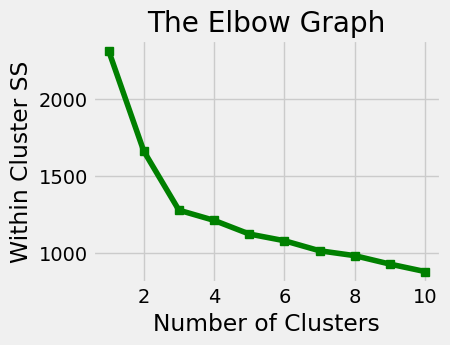

In [4]:
import matplotlib.style as style
style.available
style.use('fivethirtyeight')

wcss = {}
for i in range(1, 11):
	kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
	kmeans.fit(X)
	wcss[i] = kmeans.inertia_

plt.figure(figsize=(4,3))
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Number of Clusters")
plt.title('The Elbow Graph')
plt.ylabel('Within Cluster SS')
plt.show()

In [8]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [16]:
kmeans.cluster_centers_ # co-ordinates of the cluster centers.
kmeans.labels_ # final output

array([2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 1], dtype=int32)

In [17]:
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 101 out of 178 samples were correctly labeled.
Accuracy score: 0.57


## To plot the clusters, we need 2-D. We currently have 17 variables. Hence, let us reduce the data to 2 dimensions using Principal Components Analysis (PCA).

In [18]:
pca=PCA(n_components=2)
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
reduced_X.head() #Reduced Features


,PCA1,PCA2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


In [19]:
centers=pca.transform(kmeans.cluster_centers_)
centers

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[ 561.90981841,   -4.15062643],
       [-227.3144423 ,   -1.90191807],
       [ 155.7438715 ,    6.08321277]])

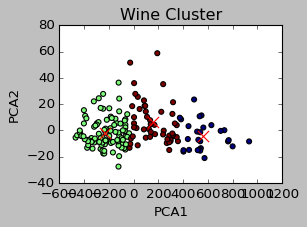

In [20]:
style.use('classic')
plt.figure(figsize=(4,3))

# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()


In [21]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

## Now, K-means clustering and PCA for the diabetes dataset

In [22]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

Text(0, 0.5, 'Within Cluster SS')

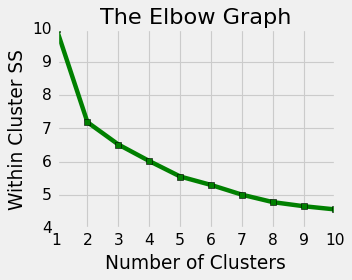

In [28]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
import matplotlib.style as style
style.available
style.use('fivethirtyeight')
wcss = {}
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss[i] = kmeans.inertia_

plt.figure(figsize=(4,3))
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Number of Clusters")
plt.title('The Elbow Graph')
plt.ylabel('Within Cluster SS')

In [25]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [26]:
kmeans.cluster_centers_
kmeans.labels_

array([2, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2,
       0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0,
       1, 2, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 1,
       2, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 2, 1,
       2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0,
       1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2, 0, 1, 2,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2, 0, 1, 2, 2, 0,
       1, 1, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2,
       2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 2,
       2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 0, 2, 1,
       0, 1, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 2, 1,

In [27]:
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 0 out of 442 samples were correctly labeled.


In [29]:
import numpy as np
new_y = np.where(y <= 152, 0, 1)
new_y

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [30]:
y.mean()

152.13348416289594

In [34]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)

kmeans.cluster_centers_
kmeans.labels_
labels = kmeans.labels_
correct_labels = sum(new_y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 304 out of 442 samples were correctly labeled.


In [ ]:
center